# Oasis Infobyte Data Science internship 2023


 # Name - Manoj Patil
 
 
 # Task 3-EMAIL SPAM DETECTION WITH MACHINE LEARNING 
 
 
# We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

# In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!



In [1]:
# Importing Required Libraries

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("oasis4 spam.csv", encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# Data Cleaning 

In [5]:
df.rename(columns = {'v1':'label', 'v2':'message'}, inplace = True)

In [6]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df[['label','message']].copy()

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.isna().sum()

label      0
message    0
dtype: int64

In [10]:
df.shape

(5572, 2)

In [11]:
df.size

11144

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
# Rename the Columns

df.rename({'v1':'Type','v2':'SMS'},axis=1,inplace=True)


In [16]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
## Checking Missing Values

df.isnull().sum()

label      0
message    0
dtype: int64

In [18]:
##Check for Duplicated Values

df.duplicated().sum()

403

In [19]:
# Removing Duplicates

df = df.drop_duplicates(keep='first')
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.duplicated().sum()

0

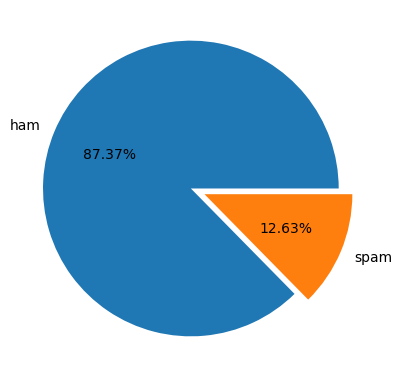

In [21]:
# To check spam and ham % of data plotting pie chart 

plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [22]:
# Seems our data is imbalaced

# So doing Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
## Number of Characters
df['num_characters'] = df['message'].apply(len) 


In [24]:
df.head()

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Number of Words


df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

df.head()

,label,message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Data Visualization 

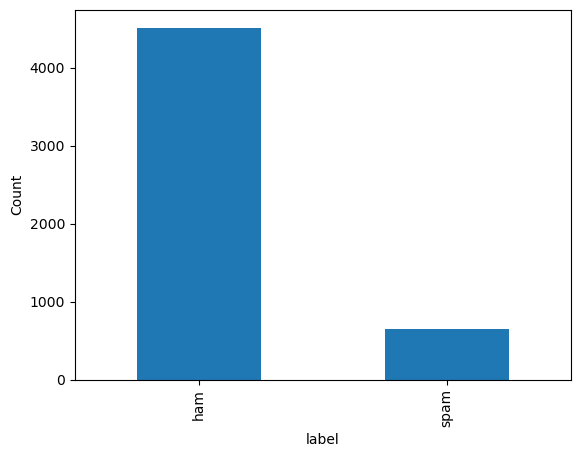

In [27]:
#Plotting Spam(1) vs Not Spam(0) value counts using bar chart


df['label'].value_counts().plot(kind='bar')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()   

Conclusion Majority of data is not spam 

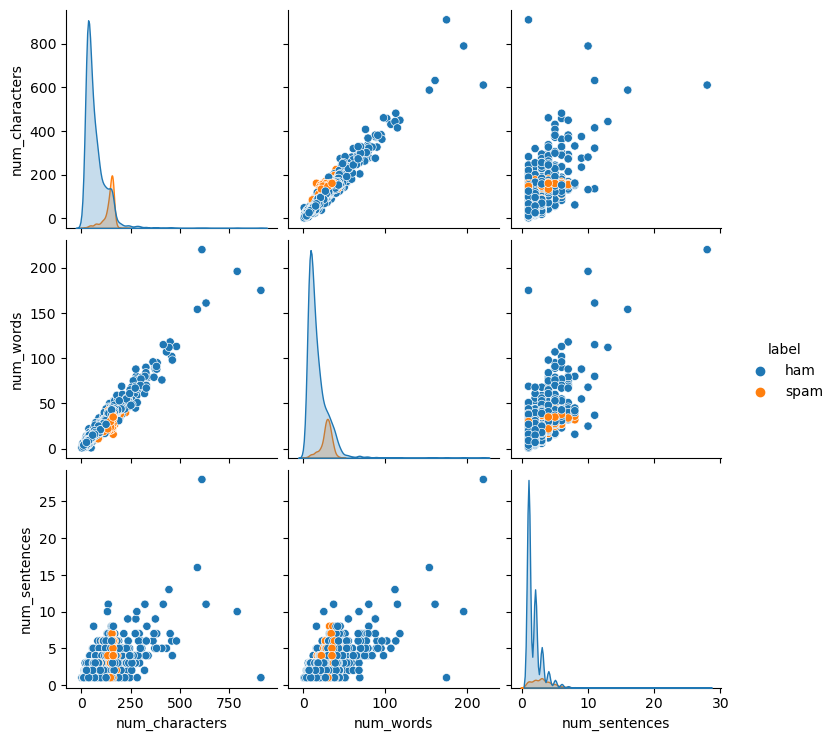

In [28]:
# Using Pairplot to identify any patterns, trends, or relationships between different features in a dataset

import seaborn as sns
sns.pairplot(df,hue='label')
plt.show()

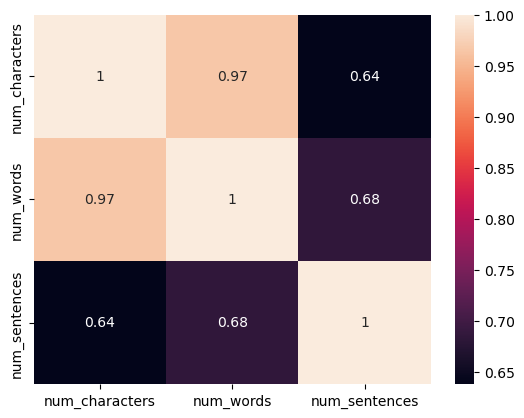

In [29]:
# Checking corr by using heat map 

sns.heatmap(df.corr(),annot=True)

plt.show()

# Checking for Outliers 

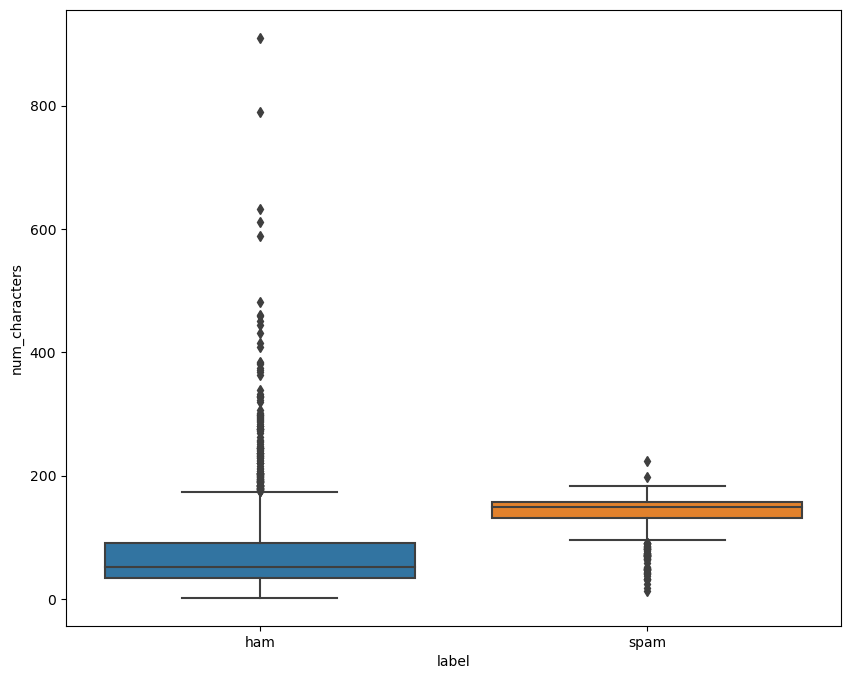

In [30]:
# Using boxplot checking for outliers

plt.figure(figsize=(10,8))
sns.boxplot(x='label',y='num_characters',data=df)

plt.show()

# Data Pre-Processing

In [31]:
# Removing punctucation, stopwords, stemming.

from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [32]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

'love yt lectur machin learn dace danc danc'

In [33]:
# Converting SMS text to Vectors by  Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

tf = TfidfVectorizer(max_features=3000)

In [34]:
# first convert label column to numeric (str to int )

df['label'] = df.label.map({'ham':0 , 'spam':1})

df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Splitting data into Label and Features (X & Y)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.20, random_state=0)


In [36]:
# Convert Sms To BOW Count verctor

count_vector = CountVectorizer()
train_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [37]:
# BOW(Bag Of Word) Look Like This 

# convert text to numbers for ML 

count_vector = CountVectorizer()
col_name = count_vector.fit(df['message']).get_feature_names()
data = count_vector.transform(list(df['message'])).toarray()
BOW = pd.DataFrame(data, columns= col_name)
BOW.head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Navie Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(train_data , y_train)


MultinomialNB()

In [39]:
predection = naive_bayes.predict(testing_data)

In [40]:
from sklearn.metrics import accuracy_score ,f1_score , precision_score , recall_score

print('Accuracy score: {}'.format(accuracy_score(y_test, predection)))
print('precision_score: {}'.format(precision_score(y_test, predection)))
print('recall_score: {}'.format(recall_score(y_test, predection)))
print('f1_score: {}'.format(f1_score(y_test, predection)))

Accuracy score: 0.9816247582205029
precision_score: 0.9710144927536232
recall_score: 0.8993288590604027
f1_score: 0.9337979094076655


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string if there are nans
#dataset['description'] = dataset['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_train = tfidf.fit_transform(X_train)
tfidf_matrix_valid= tfidf.transform(X_train)

tfidf_matrix_train.shape

(4135, 7334)

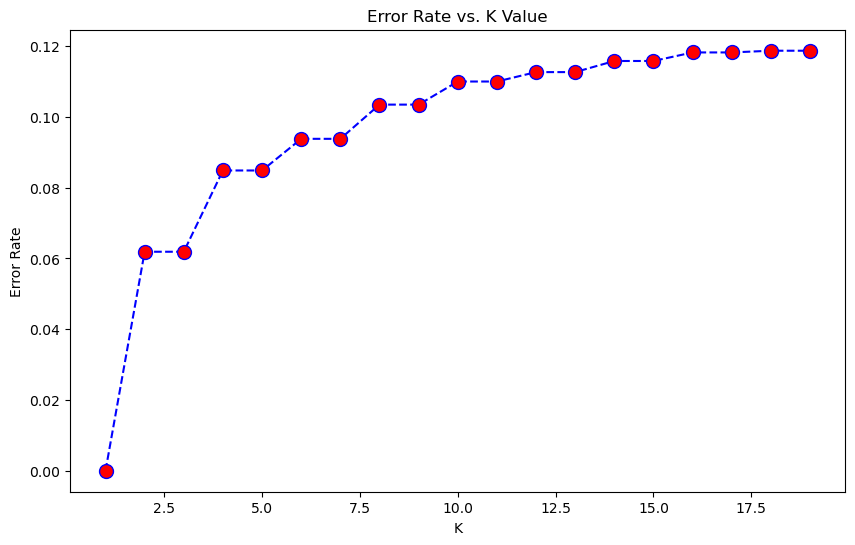

In [42]:
#Visualization to find the best K value
from sklearn.neighbors import KNeighborsClassifier
#To find the optimal k value: K=((Sqrt(N)/2)
#Visualisation for the Error Rate/K-value 
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(tfidf_matrix_train, y_train)
    pred_i_knn = knn.predict(tfidf_matrix_train)
    error_rate.append(np.mean(pred_i_knn != y_train))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [43]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} Accuracy Score:', '{:.2%}'.format(accuracy_score(y_train, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='magma')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

In [44]:
X_train.isnull().any()

False

KNN Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       1.00      1.00      1.00       504

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135



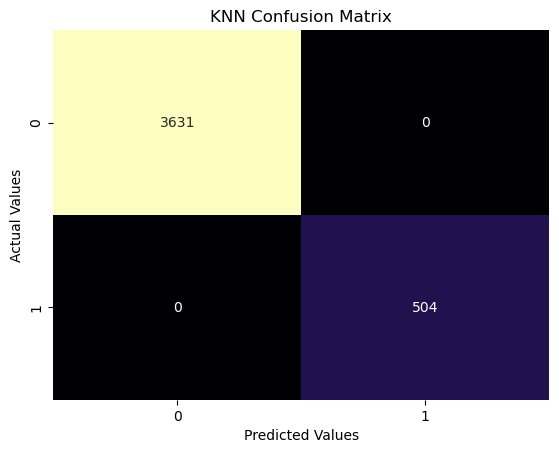

In [45]:
#Fitting the KMM model
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=1)
knn_classifier.fit(tfidf_matrix_train, y_train)
y_pred_knn=knn_classifier.predict(tfidf_matrix_valid)
cm_knn=my_confusion_matrix(y_train, y_pred_knn, 'KNN Confusion Matrix', 'KNN')

Logistic Regression: Accuracy Score: 96.30%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3631
           1       0.99      0.70      0.82       504

    accuracy                           0.96      4135
   macro avg       0.98      0.85      0.90      4135
weighted avg       0.96      0.96      0.96      4135



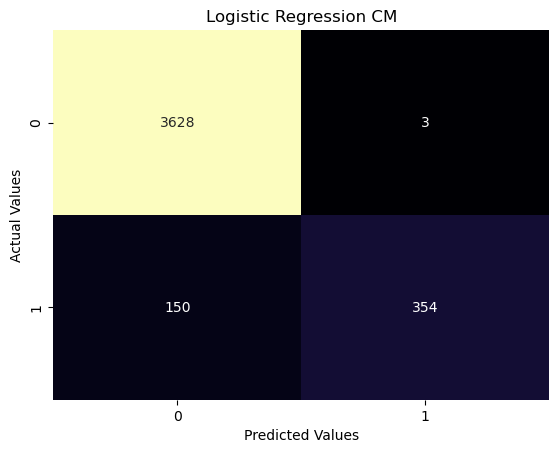

array([[3628,    3],
       [ 150,  354]], dtype=int64)

In [46]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(solver='liblinear')
log_reg_classifier.fit(tfidf_matrix_train, y_train)
y_pred_log=log_reg_classifier.predict(tfidf_matrix_valid)
my_confusion_matrix(y_train, y_pred_log, 'Logistic Regression CM', 'Logistic Regression:')

Random Forest Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       1.00      1.00      1.00       504

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135



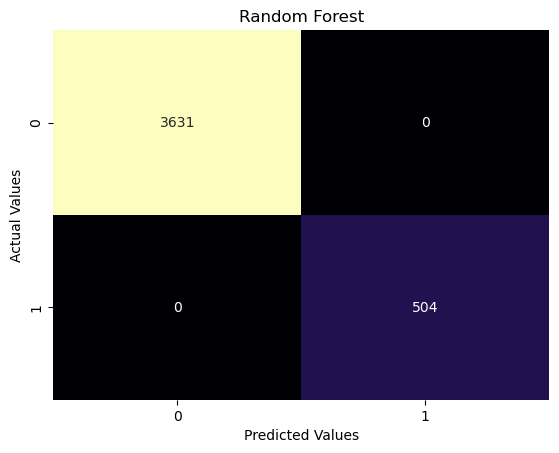

[[3631    0]
 [   0  504]]


In [47]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tfidf_matrix_train, y_train)
y_pred_rfc=rfc.predict(tfidf_matrix_valid)
print(my_confusion_matrix(y_train, y_pred_rfc, 'Random Forest', 'Random Forest'))

SVC Accuracy Score: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       1.00      1.00      1.00       504

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135



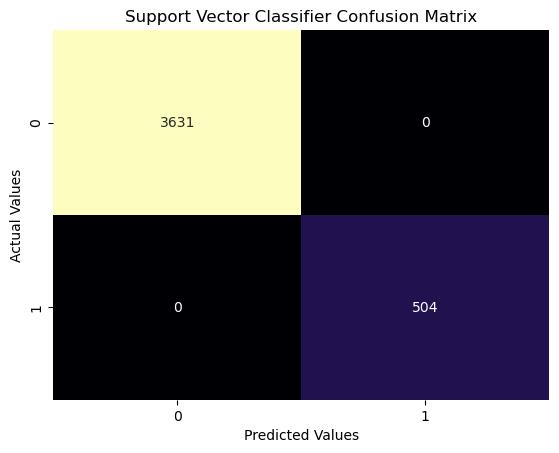

In [48]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(tfidf_matrix_train, y_train)
y_pred_svc= svc.predict(tfidf_matrix_valid)
cm_svc=my_confusion_matrix(y_train, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

Thank You